In [ ]:
pip install scikit-learn-intelex --progress-bar off

In [ ]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# read the data from the excel sheet
data = pd.read_csv('((GAssign) BankLoanApproval.csv')

Step 1: Data **Exploration**

In [ ]:
# print the first 5 rows of the data to briefly know the structure for each column
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,IA35XVH6ZO,28,140466,163781,652,94,2,9.08,48,0.23,High School,Unemployed,Married,No,No,Education,No,0
1,Y8UETC3LSG,28,149227,139759,375,56,3,5.84,36,0.80,PhD,Full-time,Divorced,No,No,Education,Yes,1
2,RM6QSRHIYP,41,23265,63527,829,87,4,9.73,60,0.45,Master's,Full-time,Divorced,Yes,No,Auto,Yes,0
3,GX5YQOGROM,53,117550,95744,395,112,4,3.58,24,0.73,High School,Unemployed,Single,No,No,Auto,Yes,0
4,X0BVPZLDC0,57,139699,88143,635,112,4,5.63,48,0.20,Master's,Part-time,Divorced,No,No,Home,No,0


In [ ]:
# print this to know the number of rows and columns in the data as well as the data type for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255327 entries, 0 to 255326
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255327 non-null  object 
 1   Age             255327 non-null  int64  
 2   Income          255327 non-null  int64  
 3   LoanAmount      255327 non-null  int64  
 4   CreditScore     255327 non-null  int64  
 5   MonthsEmployed  255327 non-null  int64  
 6   NumCreditLines  255327 non-null  int64  
 7   InterestRate    255327 non-null  float64
 8   LoanTerm        255327 non-null  int64  
 9   DTIRatio        255327 non-null  float64
 10  Education       255327 non-null  object 
 11  EmploymentType  255327 non-null  object 
 12  MaritalStatus   255327 non-null  object 
 13  HasMortgage     255327 non-null  object 
 14  HasDependents   255327 non-null  object 
 15  LoanPurpose     255327 non-null  object 
 16  HasCoSigner     255327 non-null  object 
 17  Default   

In [ ]:
# print this to know the descriptive statistics for each variable except for categorical variable
data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000
mean,43.498059,82500.225585,127579.236559,574.266125,59.542516,2.501036,13.492848,36.025896,0.500222,0.116118
std,14.990304,38963.150663,70841.308245,158.904496,34.643129,1.117021,6.636456,16.969297,0.230917,0.320367
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48826.000000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82467.000000,127557.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188986.500000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [ ]:
# print this to know the descriptive satistics for other variables
data.describe(include=['O'])

,LoanID,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
count,255327,255327,255327,255327,255327,255327,255327,255327
unique,255327,4,4,3,2,2,5,2
top,IA35XVH6ZO,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes
freq,1,64360,64156,85295,127664,127735,51296,127690


<Axes: xlabel='Education', ylabel='count'>

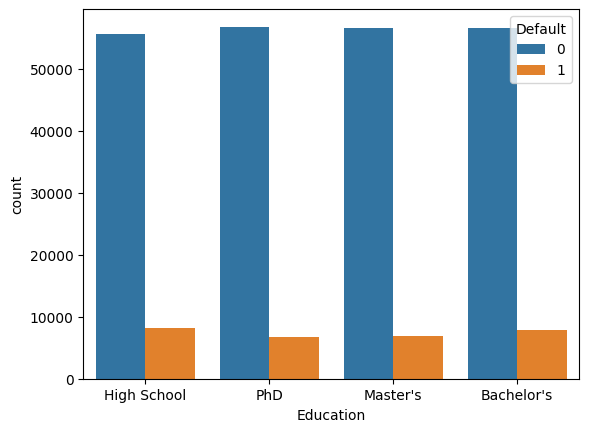

In [ ]:
# print the countplot for the education column against the default column
sns.countplot(data, x='Education', hue='Default')

<Axes: xlabel='EmploymentType', ylabel='count'>

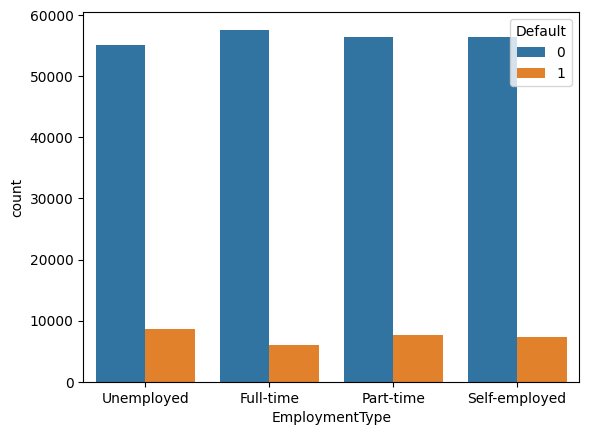

In [ ]:
# print the countplot for the employment column against the default column
sns.countplot(data, x='EmploymentType', hue='Default')

<Axes: xlabel='MaritalStatus', ylabel='count'>

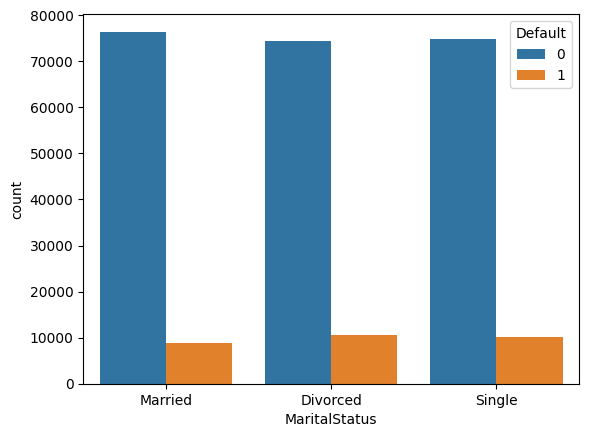

In [ ]:
# print the countplot for the marital status column against the default column
sns.countplot(data, x='MaritalStatus', hue='Default')

<Axes: xlabel='HasMortgage', ylabel='count'>

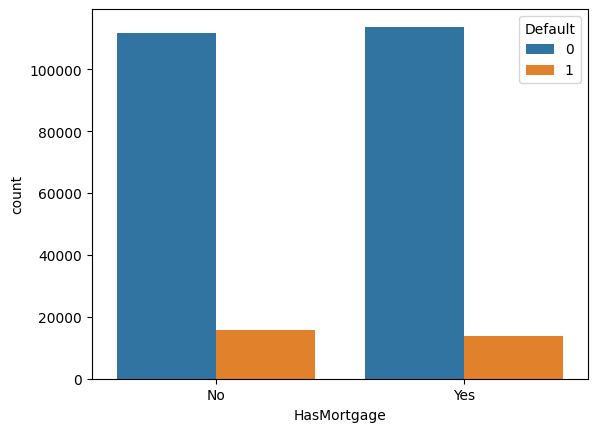

In [ ]:
# print the countplot for the HasMortgage column against the default column
sns.countplot(data, x='HasMortgage', hue='Default')

<Axes: xlabel='HasDependents', ylabel='count'>

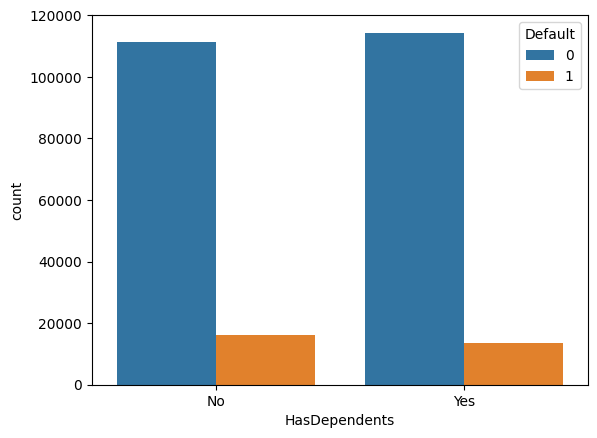

In [ ]:
# print the countplot for the HasDependents column against the default column
sns.countplot(data, x='HasDependents', hue='Default')

<Axes: xlabel='LoanPurpose', ylabel='count'>

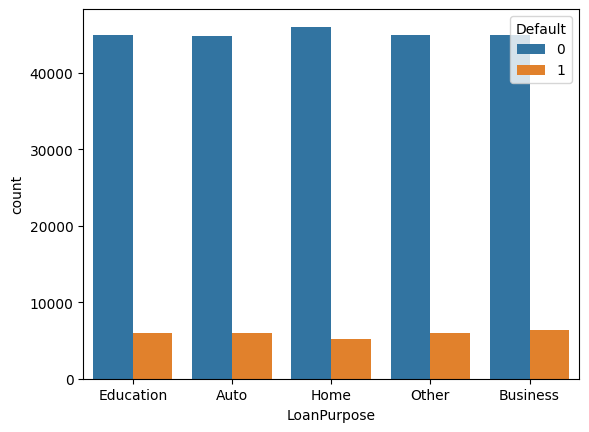

In [ ]:
# print the countplot for the LoanPurpose column against the default column
sns.countplot(data, x='LoanPurpose', hue='Default')

<Axes: xlabel='HasCoSigner', ylabel='count'>

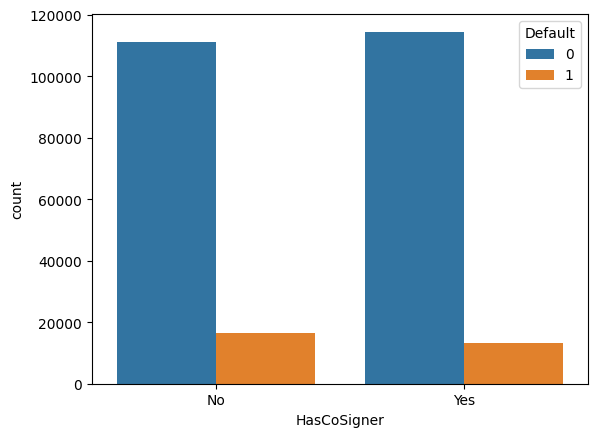

In [ ]:
# print the countplot for the HasCoSigner column against the default column
sns.countplot(data, x='HasCoSigner', hue='Default')

<Axes: xlabel='Age', ylabel='Count'>

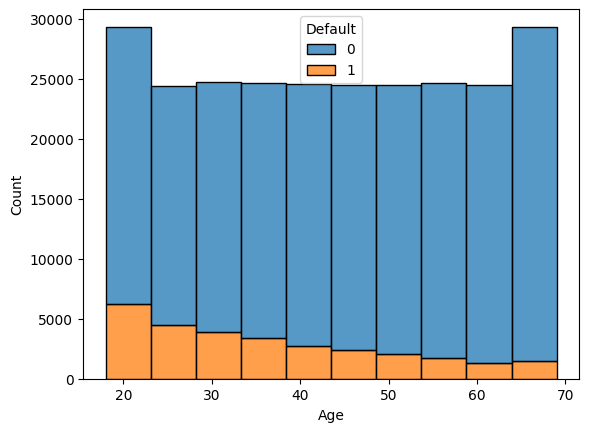

In [ ]:
# print the histplot for age column against the default column
sns.histplot(data, x='Age', hue='Default', bins=10, multiple="stack")

<Axes: xlabel='Income', ylabel='Count'>

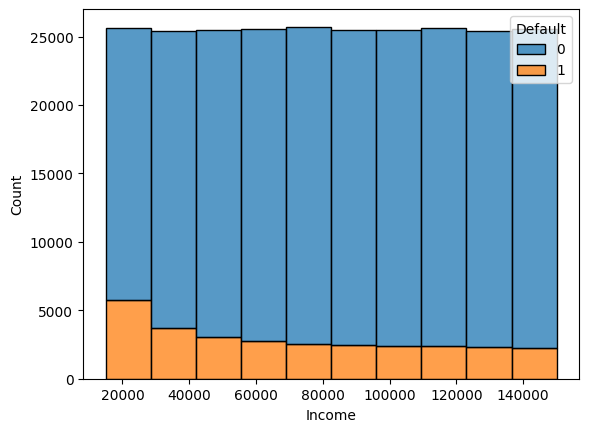

In [ ]:
# print the histplot for income column against the default column
sns.histplot(data, x='Income', hue='Default', bins=10, multiple="stack")

<Axes: xlabel='LoanAmount', ylabel='Count'>

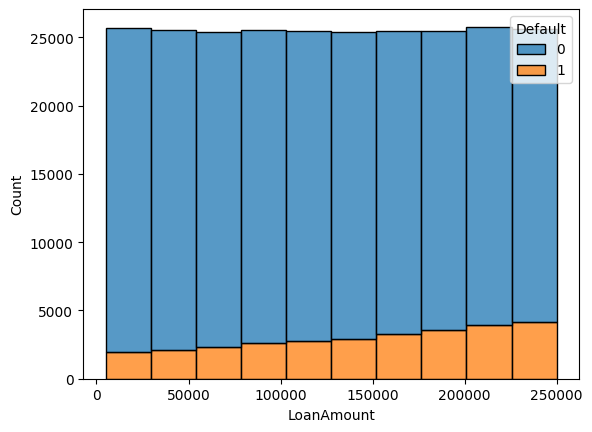

In [ ]:
# print the histplot for loan amount column against the default column
sns.histplot(data, x='LoanAmount', hue='Default', bins=10, multiple="stack")

<Axes: xlabel='CreditScore', ylabel='Count'>

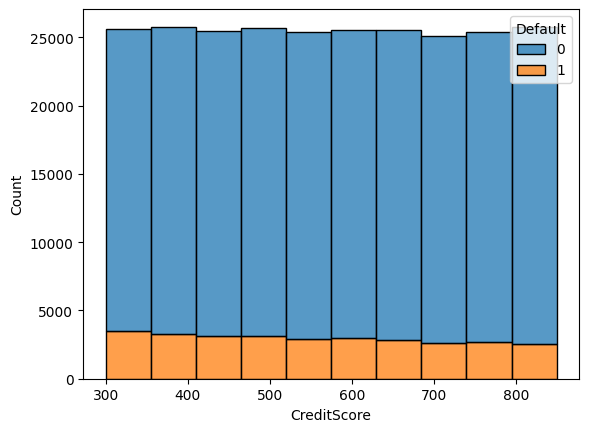

In [ ]:
# print the histplot for credit score column against the default column
sns.histplot(data, x='CreditScore', hue='Default', bins=10, multiple="stack")

<Axes: xlabel='MonthsEmployed', ylabel='Count'>

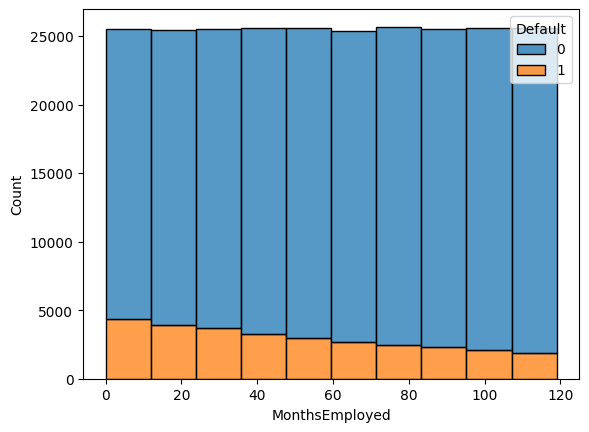

In [ ]:
# print the histplot for months employed column against the default column
sns.histplot(data, x='MonthsEmployed', hue='Default', bins=10, multiple="stack")

<Axes: xlabel='NumCreditLines', ylabel='Count'>

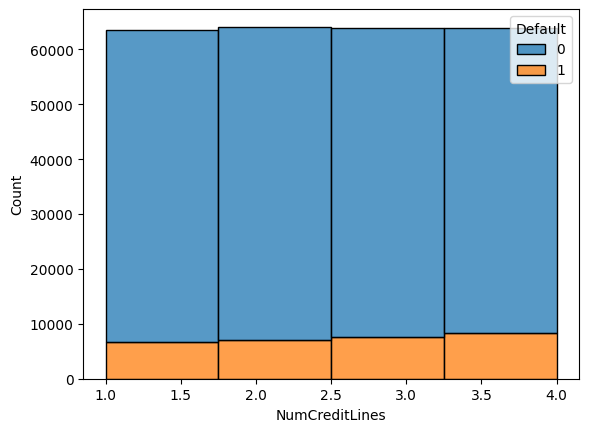

In [ ]:
# print the histplot for NumCreditLine column against the default column
sns.histplot(data, x='NumCreditLines', hue='Default', bins=4, multiple="stack")

<Axes: xlabel='InterestRate', ylabel='Count'>

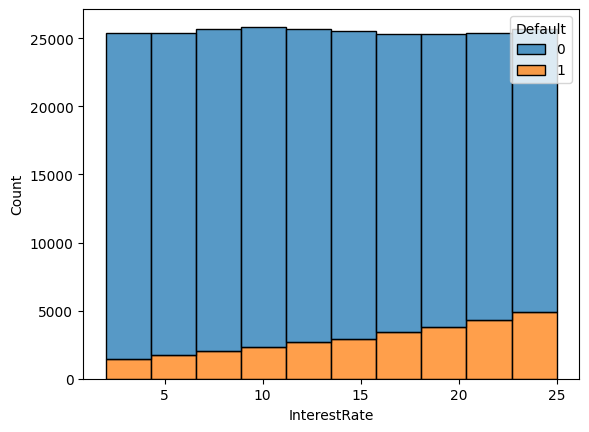

In [ ]:
# print the histplot for interest rate column against the default column
sns.histplot(data, x='InterestRate', hue='Default', bins=10, multiple="stack")

<Axes: xlabel='LoanTerm', ylabel='Count'>

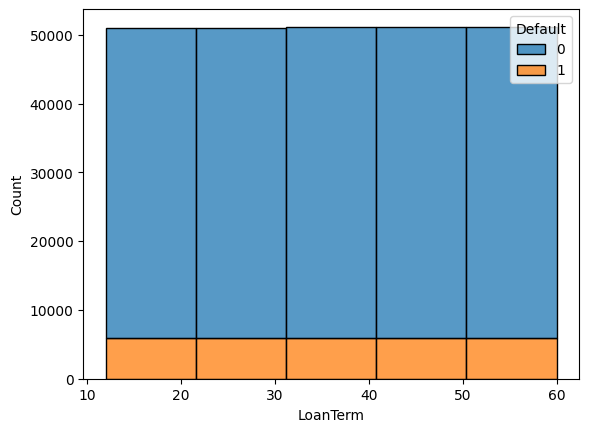

In [ ]:
# print the histplot for loan term column against the default column
sns.histplot(data, x='LoanTerm', hue='Default', bins=5, multiple="stack")

<Axes: xlabel='DTIRatio', ylabel='Count'>

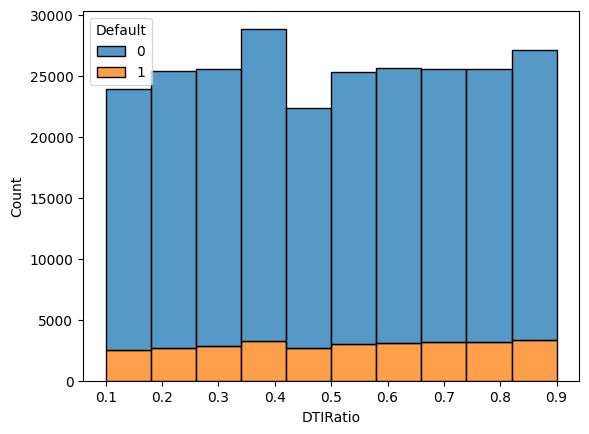

In [ ]:
# print the histplot for DTIRatio column against the default column
sns.histplot(data, x='DTIRatio', hue='Default', bins=10, multiple="stack")

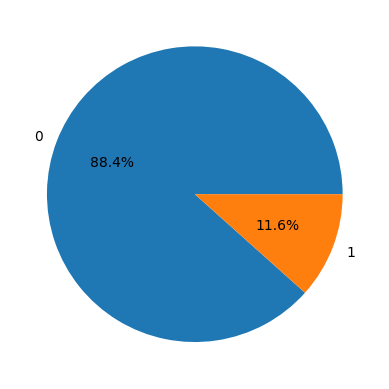

In [ ]:
# print a pie chart for the Default column to see whether the class is imbalanced or not
temp = data['Default'].value_counts()
plt.pie(temp.values, labels=temp.index, autopct='%1.1f%%')
plt.show()

In [ ]:
# Define feature vector and target variable (class)
X = data.drop(['Default'], axis=1)
y = data['Default']

In [ ]:
# deleting of unneeded columns since this columns will not help us in making a predictive model
X.drop(['LoanID'], axis=1, inplace=True)

In [ ]:
# Transforming the qualitatives variables into quantitatives for training data
X['Education'] = X['Education'].map({"Bachelor's": 0, "High School": 1, "Master's": 2, "PhD": 3} ).astype(int)
X['EmploymentType'] = X['EmploymentType'].map( {'Full-time': 0, 'Part-time': 1,'Unemployed':2, 'Self-employed': 3} ).astype(int)
X['MaritalStatus'] = X['MaritalStatus'].map( {'Divorced': 0, 'Married': 1, 'Single': 2}).astype(int)
X['HasMortgage'] = X['HasMortgage'].map( {'No': 0, 'Yes': 1}).astype(int)
X['HasDependents'] = X['HasDependents'].map( {'No': 0, 'Yes': 1}).astype(int)
X['LoanPurpose'] = X['LoanPurpose'].map( {'Auto': 0, 'Business': 1, 'Education': 2, 'Home': 3, 'Other': 4}).astype(int)
X['HasCoSigner'] = X['HasCoSigner'].map( {'No': 0, 'Yes': 1}).astype(int)
X.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,28,140466,163781,652,94,2,9.08,48,0.23,1,2,1,0,0,2,0
1,28,149227,139759,375,56,3,5.84,36,0.80,3,0,0,0,0,2,1
2,41,23265,63527,829,87,4,9.73,60,0.45,2,0,0,1,0,0,1
3,53,117550,95744,395,112,4,3.58,24,0.73,1,2,2,0,0,0,1
4,57,139699,88143,635,112,4,5.63,48,0.20,2,1,0,0,0,3,0


In [ ]:
# Set up the oversampling method
oversampler = SMOTE()
X_new, y_new = oversampler.fit_resample(X, y)

X.shape, X_new.shape

((255327, 16), (451358, 16))

Step 2: Data Splitting (60% for training set, 20% for testing set, and 20% for validation set)

In [ ]:
#Split data into separate training, test, and validation set
X_train, X_temp, y_train, y_temp = train_test_split(X_new, y_new, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
#Check the shape of X_train and X_test
print("train sample size: ", X_train.shape)
print("test sample size: ", X_test.shape)
print("validation sample size: ", X_val.shape)

train sample size:  (270814, 16)
test sample size:  (90272, 16)
validation sample size:  (90272, 16)


Step 3: Data Preprocessing

Training Data

In [ ]:
# Looking for null values in training data
print("Null values:\n", X_train.isnull().sum())

Null values:
 Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64


In [ ]:
# Check duplicate rows in training data
duplicate_rows = X_train[X_train.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape)

Number of duplicate rows:  (0, 16)


In [ ]:
# Removing outliers using z-score
z = np.abs(stats.zscore(X_train))

df3 = X_train[(z<3).all(axis=1)]
df3.shape

(270814, 16)

Text(0.5, 1.0, 'Pearson Correlation')

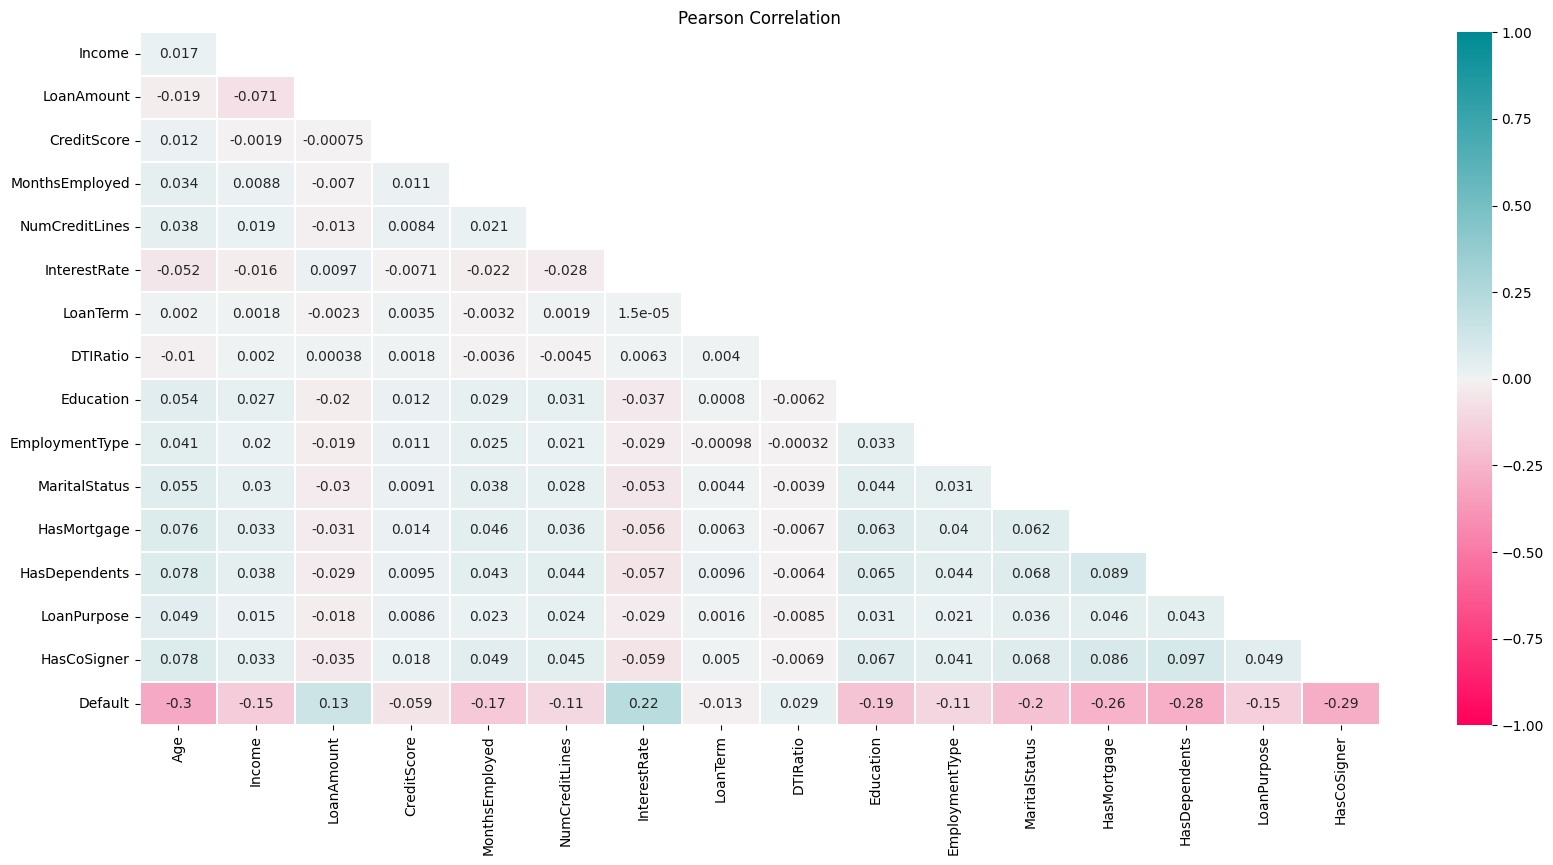

In [ ]:
df3['Default'] = y_train

# Finding the correlation between variables
pearsonCorr = df3.corr(method='pearson')

# Create mask for both correlation matrices
# Pearson corr masking
# Generating mask for upper triangle
maskP = np.triu(np.ones_like(pearsonCorr,dtype=bool))

# Adjust mask and correlation
maskP = maskP[1:,:-1]
pCorr = pearsonCorr.iloc[1:,:-1].copy()
# Setting up a diverging palette
cmap = sns.diverging_palette(0, 200, 150, 50, as_cmap=True)
fig = plt.subplots(figsize=(20,9))
sns.heatmap(pCorr, vmin=-1,vmax=1, cmap = cmap, annot=True, linewidth=0.3, mask=maskP)
plt.title("Pearson Correlation")

Testing Data

In [ ]:
# Looking for null values in testing data
print("Null values:\n", X_test.isnull().sum())

Null values:
 Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64


In [ ]:
# Check duplicate rows in testing data
duplicate_rows = X_test[X_test.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape)

Number of duplicate rows:  (0, 16)


Validation Data

In [ ]:
# Looking for null values in validation data
print("Null values:\n", X_val.isnull().sum())

Null values:
 Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64


In [ ]:
# Check duplicate rows in validation data
duplicate_rows = X_val[X_val.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape)

Number of duplicate rows:  (0, 16)


Step 4: Algorithm and Selection, Step 5: Model Training, Step 6: Model Evaluation, Step 7: Comparison and Selection

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

Logistic Regression (before tuning the parameters)

In [ ]:
logReg = LogisticRegression(random_state=0, solver='liblinear')
logReg.fit(X_train_new, y_train)

y_pred_logReg = logReg.predict(X_test)
y_pred_logReg_val = logReg.predict(X_val)

In [ ]:
# Classification Report for LR with validation data
print("\nLogistic Regression Evaluation:\n")
print(classification_report(y_val, y_pred_logReg_val))

# Confusion Matrix for LR with validation data
print("\nLogistic Regression confusion matrix:\n")
cm = confusion_matrix(y_val, y_pred_logReg_val)
print(cm)


Logistic Regression Evaluation:

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     45184
           1       0.78      0.80      0.79     45088

    accuracy                           0.79     90272
   macro avg       0.79      0.79      0.79     90272
weighted avg       0.79      0.79      0.79     90272


Logistic Regression confusion matrix:

[[34916 10268]
 [ 9133 35955]]


In [ ]:
# Classification Report for LR with test data
print("\nLogistic Regression Evaluation:\n")
print(classification_report(y_test, y_pred_logReg))

# Confusion Matrix for LR with test data
print("\nLogistic Regression confusion matrix:\n")
cm = confusion_matrix(y_test, y_pred_logReg)
print(cm)


Logistic Regression Evaluation:

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     45180
           1       0.78      0.79      0.78     45092

    accuracy                           0.78     90272
   macro avg       0.78      0.78      0.78     90272
weighted avg       0.78      0.78      0.78     90272


Logistic Regression confusion matrix:

[[34843 10337]
 [ 9403 35689]]


Logistic Regression (after tuning the parameters)

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(random_state=0, solver='liblinear'), param_grid, cv=5)
grid_search.fit(X_train_new, y_train)

print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'C': 0.001, 'penalty': 'l2'}


In [ ]:
y_pred_logReg_hyper = grid_search.predict(X_test)
y_pred_logReg_hyper_val = grid_search.predict(X_val)

In [ ]:
# Classification Report for LR with validation data
print("\nLogistic Regression Evaluation:\n")
print(classification_report(y_val, y_pred_logReg_hyper_val))

# Confusion Matrix for LR with validation data
print("\nLogistic Regression confusion matrix:\n")
cm = confusion_matrix(y_val, y_pred_logReg_hyper_val)
print(cm)


Logistic Regression Evaluation:

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     45184
           1       0.78      0.80      0.79     45088

    accuracy                           0.79     90272
   macro avg       0.79      0.79      0.79     90272
weighted avg       0.79      0.79      0.79     90272


Logistic Regression confusion matrix:

[[34899 10285]
 [ 9109 35979]]


In [ ]:
# Classification Report for LR with test data
print("\nLogistic Regression Evaluation:\n")
print(classification_report(y_test, y_pred_logReg_hyper))

# Confusion Matrix for LR with test data
print("\nLogistic Regression confusion matrix:\n")
cm = confusion_matrix(y_test, y_pred_logReg_hyper)
print(cm)


Logistic Regression Evaluation:

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     45180
           1       0.77      0.79      0.78     45092

    accuracy                           0.78     90272
   macro avg       0.78      0.78      0.78     90272
weighted avg       0.78      0.78      0.78     90272


Logistic Regression confusion matrix:

[[34805 10375]
 [ 9384 35708]]


Decision Trees (before tuning the parameters)

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dt = dt.fit(X_train_new, y_train)
y_pred_dt = dt.predict(X_test)
y_pred_dt_val = dt.predict(X_val)

In [ ]:
# Classification Report for Decision Trees with validation data
print("\nDecision Trees Evaluation:\n")
print(classification_report(y_val, y_pred_dt_val))

# Confusion Matrix for Decision Trees with validation data
print("\nDecision Trees confusion matrix:\n")
cm = confusion_matrix(y_val, y_pred_dt_val)
print(cm)


Decision Trees Evaluation:

              precision    recall  f1-score   support

           0       0.76      0.71      0.74     45184
           1       0.73      0.77      0.75     45088

    accuracy                           0.74     90272
   macro avg       0.74      0.74      0.74     90272
weighted avg       0.74      0.74      0.74     90272


Decision Trees confusion matrix:

[[32200 12984]
 [10158 34930]]


In [ ]:
# Classification Report for Decision Trees with testing data
print("\nDecision Trees Evaluation:\n")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix for Decision Trees with validation data
print("\nDecision Trees confusion matrix:\n")
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)


Decision Trees Evaluation:

              precision    recall  f1-score   support

           0       0.76      0.71      0.73     45180
           1       0.73      0.77      0.75     45092

    accuracy                           0.74     90272
   macro avg       0.74      0.74      0.74     90272
weighted avg       0.74      0.74      0.74     90272


Decision Trees confusion matrix:

[[32208 12972]
 [10335 34757]]


Decision Trees (after tuning the parameters)

In [ ]:
# Define the parameter grid to search
param_grid = {
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_new, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Retrieve the best model
best_dt = grid_search.best_estimator_

Best Parameters: {'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
y_pred_dt_hyper = best_dt.predict(X_test)
y_pred_dt_hyper_val = best_dt.predict(X_val)

In [ ]:
# Classification Report for Decision Trees with validation data
print("\nDecision Trees Evaluation:\n")
print(classification_report(y_val, y_pred_dt_hyper_val))

# Confusion Matrix for Decision Trees with validation data
print("\nDecision Trees confusion matrix:\n")
cm = confusion_matrix(y_val, y_pred_dt_hyper_val)
print(cm)


Decision Trees Evaluation:

              precision    recall  f1-score   support

           0       0.81      0.83      0.82     45184
           1       0.83      0.80      0.81     45088

    accuracy                           0.82     90272
   macro avg       0.82      0.82      0.82     90272
weighted avg       0.82      0.82      0.82     90272


Decision Trees confusion matrix:

[[37607  7577]
 [ 8891 36197]]


In [ ]:
# Classification Report for Decision Trees with validation data
print("\nDecision Trees Evaluation:\n")
print(classification_report(y_test, y_pred_dt_hyper))

# Confusion Matrix for Decision Trees with validation data
print("\nDecision Trees confusion matrix:\n")
cm = confusion_matrix(y_test, y_pred_dt_hyper)
print(cm)


Decision Trees Evaluation:

              precision    recall  f1-score   support

           0       0.80      0.83      0.82     45180
           1       0.82      0.80      0.81     45092

    accuracy                           0.81     90272
   macro avg       0.81      0.81      0.81     90272
weighted avg       0.81      0.81      0.81     90272


Decision Trees confusion matrix:

[[37457  7723]
 [ 9086 36006]]


Random Forest Classifier (before tuning the parameters)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_new,y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf_val = rf.predict(X_val)

In [ ]:
# Classification Report for Random Forest Classifier with validation data
print("\nRandom Forest Classifier Evaluation:\n")
print(classification_report(y_val, y_pred_rf_val))

# Confusion Matrix for Random Forest Classifier with validation data
print("\nRandom Forest Classifier confusion matrix:\n")
cm = confusion_matrix(y_val, y_pred_rf_val)
print(cm)


Random Forest Classifier Evaluation:

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     45184
           1       0.90      0.85      0.87     45088

    accuracy                           0.88     90272
   macro avg       0.88      0.88      0.88     90272
weighted avg       0.88      0.88      0.88     90272


Random Forest Classifier confusion matrix:

[[40760  4424]
 [ 6761 38327]]


In [ ]:
# Classification Report for Random Forest Classifier with testing data
print("\nRandom Forest Classifier Evaluation:\n")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest Classifier with testing data
print("\nRandom Forest Classifier confusion matrix:\n")
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)


Random Forest Classifier Evaluation:

              precision    recall  f1-score   support

           0       0.85      0.90      0.88     45180
           1       0.90      0.84      0.87     45092

    accuracy                           0.87     90272
   macro avg       0.87      0.87      0.87     90272
weighted avg       0.87      0.87      0.87     90272


Random Forest Classifier confusion matrix:

[[40791  4389]
 [ 7155 37937]]


Random Forest Classifier (after tuning the parameters)

In [ ]:
rf=RandomForestClassifier()
grid_space={
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(X_train_new, y_train)

# Get the best parameters
best_params = model_grid.best_params_
print("Best Parameters:", best_params)

# Retrieve the best model
best_rf = model_grid.best_estimator_

Best Parameters: {'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
y_pred_rf_hyper = best_rf.predict(X_test)
y_pred_rf_hyper_val = best_rf.predict(X_val)

In [ ]:
# Classification Report for Random Forest Classifier with validation data
print("\nRandom Forest Classifier Evaluation:\n")
print(classification_report(y_val, y_pred_rf_hyper_val))

# Confusion Matrix for Random Forest Classifier with validation data
print("\nRandom Forest Classifier confusion matrix:\n")
cm = confusion_matrix(y_val, y_pred_rf_hyper_val)
print(cm)


Random Forest Classifier Evaluation:

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     45184
           1       0.89      0.85      0.87     45088

    accuracy                           0.87     90272
   macro avg       0.88      0.87      0.87     90272
weighted avg       0.88      0.87      0.87     90272


Random Forest Classifier confusion matrix:

[[40677  4507]
 [ 6858 38230]]


In [ ]:
# Classification Report for Random Forest Classifier with testing data
print("\nRandom Forest Classifier Evaluation:\n")
print(classification_report(y_test, y_pred_rf_hyper))

# Confusion Matrix for Random Forest Classifier with testing data
print("\nRandom Forest Classifier confusion matrix:\n")
cm = confusion_matrix(y_test, y_pred_rf_hyper)
print(cm)


Random Forest Classifier Evaluation:

              precision    recall  f1-score   support

           0       0.85      0.90      0.88     45180
           1       0.89      0.84      0.87     45092

    accuracy                           0.87     90272
   macro avg       0.87      0.87      0.87     90272
weighted avg       0.87      0.87      0.87     90272


Random Forest Classifier confusion matrix:

[[40720  4460]
 [ 7141 37951]]


Naive Bayes(before tuning the hyper parameter)

In [ ]:
nb = GaussianNB()
nb.fit(X_train_new,y_train)

y_pred_nb = nb.predict(X_test)
y_pred_nb_val = nb.predict(X_val)

In [ ]:
# Classification Report for Naive Bayes with validation data
print("\nNaive Bayes Classifier Evaluation:\n")
print(classification_report(y_val, y_pred_nb_val))

# Confusion Matrix for Naive Bayes with validation data
print("\nNaive Bayes confusion matrix:\n")
cm = confusion_matrix(y_val, y_pred_nb_val)
print(cm)


Naive Bayes Classifier Evaluation:

              precision    recall  f1-score   support

           0       0.81      0.82      0.82     45184
           1       0.82      0.81      0.82     45088

    accuracy                           0.82     90272
   macro avg       0.82      0.82      0.82     90272
weighted avg       0.82      0.82      0.82     90272


Naive Bayes confusion matrix:

[[37255  7929]
 [ 8542 36546]]


In [ ]:
# Classification Report for Naive Bayes with testing data
print("\nNaive Bayes Classifier Evaluation:\n")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix for Naive Bayes with testing data
print("\nNaive Bayes confusion matrix:\n")
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)


Naive Bayes Classifier Evaluation:

              precision    recall  f1-score   support

           0       0.81      0.82      0.82     45180
           1       0.82      0.80      0.81     45092

    accuracy                           0.81     90272
   macro avg       0.81      0.81      0.81     90272
weighted avg       0.81      0.81      0.81     90272


Naive Bayes confusion matrix:

[[37142  8038]
 [ 8802 36290]]


Naive Bayes (after tuning the hyperparameter)

In [ ]:
nb = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb,
                 param_grid=params_NB,
                 cv=10,   # use any cross validation technique
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train_new, y_train)

gs_NB.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'var_smoothing': 0.002848035868435802}

In [ ]:
y_pred_nb_hyper = gs_NB.predict(X_test)
y_pred_nb_hyper_val = gs_NB.predict(X_val)

In [ ]:
# Classification Report for Naive Bayes with validation data
print("\nNaive Bayes Classifier Evaluation:\n")
print(classification_report(y_val, y_pred_nb_hyper_val))

# Confusion Matrix for Naive Bayes with validation data
print("\nNaive Bayes confusion matrix:\n")
cm = confusion_matrix(y_val, y_pred_nb_hyper_val)
print(cm)


Naive Bayes Classifier Evaluation:

              precision    recall  f1-score   support

           0       0.81      0.82      0.82     45184
           1       0.82      0.81      0.82     45088

    accuracy                           0.82     90272
   macro avg       0.82      0.82      0.82     90272
weighted avg       0.82      0.82      0.82     90272


Naive Bayes confusion matrix:

[[37201  7983]
 [ 8492 36596]]


In [ ]:
# Classification Report for Naive Bayes with testing data
print("\nNaive Bayes Classifier Evaluation:\n")
print(classification_report(y_test, y_pred_nb_hyper))

# Confusion Matrix for Naive Bayes with testing data
print("\nNaive Bayes confusion matrix:\n")
cm = confusion_matrix(y_test, y_pred_nb_hyper)
print(cm)


Naive Bayes Classifier Evaluation:

              precision    recall  f1-score   support

           0       0.81      0.82      0.81     45180
           1       0.82      0.81      0.81     45092

    accuracy                           0.81     90272
   macro avg       0.81      0.81      0.81     90272
weighted avg       0.81      0.81      0.81     90272


Naive Bayes confusion matrix:

[[37086  8094]
 [ 8761 36331]]


Neural Network (before tuning the hyperparameter)

In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train_new,y_train)

y_pred_mlp = mlp.predict(X_test)
y_pred_mlp_val = mlp.predict(X_val)

In [ ]:
# Classification Report for Neural Network with validation data
print("\nNeural Network Evaluation:\n")
print(classification_report(y_val, y_pred_mlp_val))

# Confusion Matrix for Neural Network with validation data
print("\nNeural Network confusion matrix:\n")
cm = confusion_matrix(y_val, y_pred_mlp_val)
print(cm)


Neural Network Evaluation:

              precision    recall  f1-score   support

           0       0.82      0.84      0.83     45184
           1       0.84      0.82      0.83     45088

    accuracy                           0.83     90272
   macro avg       0.83      0.83      0.83     90272
weighted avg       0.83      0.83      0.83     90272


Neural Network confusion matrix:

[[37922  7262]
 [ 8106 36982]]


In [ ]:
# Classification Report for Neural Network with testing data
print("\nNeural Network Evaluation:\n")
print(classification_report(y_test, y_pred_mlp))

# Confusion Matrix for Neural Network with testing data
print("\nNeural Network confusion matrix:\n")
cm = confusion_matrix(y_test, y_pred_mlp)
print(cm)


Neural Network Evaluation:

              precision    recall  f1-score   support

           0       0.82      0.84      0.83     45180
           1       0.83      0.82      0.82     45092

    accuracy                           0.83     90272
   macro avg       0.83      0.83      0.83     90272
weighted avg       0.83      0.83      0.83     90272


Neural Network confusion matrix:

[[37907  7273]
 [ 8335 36757]]


Neural Network (after tuning the hyperparameter)

In [ ]:
mlp = MLPClassifier()
tuned_parameters= {'hidden_layer_sizes': range(1,200,10),
                   'activation': ['tanh','logistic','relu'], 'alpha':[0.0001,0.001,0.01,0.1,1,10],
                   'max_iter': range(50,200,50)}

model_mlp= RandomizedSearchCV(mlp, tuned_parameters,cv=3,scoring='accuracy',n_iter=3,n_jobs= -1,random_state=5)
model_mlp.fit(X_train_new, y_train)

model_mlp.best_params_

{'max_iter': 50, 'hidden_layer_sizes': 91, 'alpha': 0.01, 'activation': 'relu'}

In [ ]:
y_pred_mlp_hyper = model_mlp.predict(X_test)
y_pred_mlp_hyper_val = model_mlp.predict(X_val)

In [ ]:
# Classification Report for Neural Network with validation data
print("\nNeural Network Evaluation:\n")
print(classification_report(y_val, y_pred_mlp_hyper_val))

# Confusion Matrix for Neural Network with validation data
print("\nNeural Network confusion matrix:\n")
cm = confusion_matrix(y_val, y_pred_mlp_hyper_val)
print(cm)


Neural Network Evaluation:

              precision    recall  f1-score   support

           0       0.82      0.84      0.83     45184
           1       0.84      0.81      0.82     45088

    accuracy                           0.83     90272
   macro avg       0.83      0.83      0.83     90272
weighted avg       0.83      0.83      0.83     90272


Neural Network confusion matrix:

[[38047  7137]
 [ 8462 36626]]


In [ ]:
# Classification Report for Neural Network with testing data
print("\nNeural Network Evaluation:\n")
print(classification_report(y_test, y_pred_mlp_hyper))

# Confusion Matrix for Neural Network with testing data
print("\nNeural Network confusion matrix:\n")
cm = confusion_matrix(y_test, y_pred_mlp_hyper)
print(cm)


Neural Network Evaluation:

              precision    recall  f1-score   support

           0       0.81      0.84      0.83     45180
           1       0.84      0.81      0.82     45092

    accuracy                           0.83     90272
   macro avg       0.83      0.83      0.83     90272
weighted avg       0.83      0.83      0.83     90272


Neural Network confusion matrix:

[[38126  7054]
 [ 8666 36426]]


K-Nearest Neighbors

In [ ]:
# find the accuracy and errors rate for k starts from 5 to 11
k_values = [i for i in range (5,11)]
scores = []
error_rate = []
for k in k_values:
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(X_train_new, y_train)
 y_pred = knn.predict(X_test)
 scores.append(knn.score(X_test, y_test))
 error_rate.append(np.mean(y_pred!=y_test))

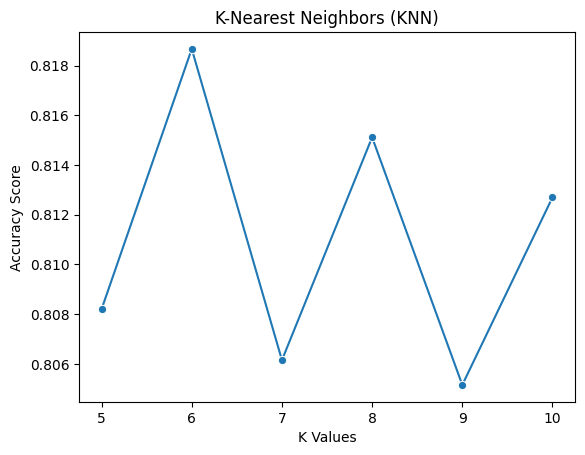

In [ ]:
# Plot the accuracy score for each k-values
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.title("K-Nearest Neighbors (KNN)")
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show()

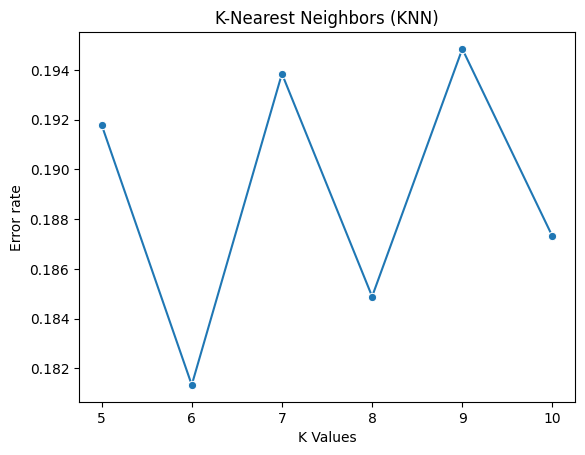

In [ ]:
# Plot the error rate for each k-values
sns.lineplot(x = k_values, y = error_rate, marker = 'o')
plt.title("K-Nearest Neighbors (KNN)")
plt.xlabel("K Values")
plt.ylabel("Error rate")
plt.show()

In [ ]:
#Get the best k and train kNN
best_index = np.argmax(scores)
best_k = k_values[best_index]
print("\nk = ", best_k)
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_new, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn_val = knn.predict(X_val)


k =  6


In [ ]:
# Classification Report for K-Nearest Neighbour with validation data
print("\nK-Nearest Neighbour Evaluation:\n")
print(classification_report(y_val, y_pred_knn_val))

# Confusion Matrix for K-Nearest Neighbour with validation data
print("\nK-Nearest Neighbour confusion matrix:\n")
cm = confusion_matrix(y_val, y_pred_knn_val)
print(cm)


K-Nearest Neighbour Evaluation:

              precision    recall  f1-score   support

           0       0.85      0.78      0.81     45184
           1       0.80      0.86      0.83     45088

    accuracy                           0.82     90272
   macro avg       0.82      0.82      0.82     90272
weighted avg       0.82      0.82      0.82     90272


K-Nearest Neighbour confusion matrix:

[[35161 10023]
 [ 6106 38982]]


In [ ]:
# Classification Report for K-Nearest Neighbour with testing data
print("\nK-Nearest Neighbour Evaluation:\n")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix for K-Nearest Neighbour with testing data
print("\nK-Nearest Neighbour confusion matrix:\n")
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)


K-Nearest Neighbour Evaluation:

              precision    recall  f1-score   support

           0       0.85      0.77      0.81     45180
           1       0.79      0.86      0.83     45092

    accuracy                           0.82     90272
   macro avg       0.82      0.82      0.82     90272
weighted avg       0.82      0.82      0.82     90272


K-Nearest Neighbour confusion matrix:

[[34995 10185]
 [ 6184 38908]]


Support Vector Machine (SVM)

In [ ]:
svm = CalibratedClassifierCV(LinearSVC())
svm.fit(X_train_new, y_train)
y_pred_svm = svm.predict(X_test)
y_pred_svm_val = svm.predict(X_val)

In [ ]:
# Classification Report for Support Vector Machine with validation data
print("\nSupport Vector Machine Evaluation:\n")
print(classification_report(y_val, y_pred_svm_val))

# Confusion Matrix for Support Vector Machine with validation data
print("\nSupport Vector Machine confusion matrix:\n")
cm = confusion_matrix(y_val, y_pred_svm_val)
print(cm)


Support Vector Machine Evaluation:

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     45184
           1       0.78      0.80      0.79     45088

    accuracy                           0.79     90272
   macro avg       0.79      0.79      0.79     90272
weighted avg       0.79      0.79      0.79     90272


Support Vector Machine confusion matrix:

[[34921 10263]
 [ 9131 35957]]


In [ ]:
# Classification Report for Support Vector Machine with testing data
print("\nSupport Vector Machine Evaluation:\n")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix for Support Vector Machine with testing data
print("\nSupport Vector Machine confusion matrix:\n")
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)


Support Vector Machine Evaluation:

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     45180
           1       0.78      0.79      0.78     45092

    accuracy                           0.78     90272
   macro avg       0.78      0.78      0.78     90272
weighted avg       0.78      0.78      0.78     90272


Support Vector Machine confusion matrix:

[[34843 10337]
 [ 9407 35685]]


AUC Score

In [ ]:
auc_score_logReg = roc_auc_score(y_test, logReg.predict_proba(X_test)[:, 1])
auc_score_dt = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
auc_score_rf = roc_auc_score(y_test, model_grid.predict_proba(X_test)[:, 1])
auc_score_nb = roc_auc_score(y_test, gs_NB.predict_proba(X_test)[:, 1])
auc_score_mlp = roc_auc_score(y_test, model_mlp.predict_proba(X_test)[:, 1])
auc_score_knn = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
auc_score_svm = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
print("AUC score for LR: ", auc_score_logReg)
print("AUC score for Decision Trees: ", auc_score_dt)
print("AUC score for Random Forest Classifier: ", auc_score_rf)
print("AUC score for Naive Bayes: ", auc_score_nb)
print("AUC score for Neural Network: ", auc_score_mlp)
print("AUC score for K-Nearest Neighbour: ", auc_score_knn)
print("AUC score for Support Vector Machine: ", auc_score_svm)

AUC score for LR:  0.8600761138302581
AUC score for Decision Trees:  0.8626672963075401
AUC score for Random Forest Classifier:  0.9407968461763108
AUC score for Naive Bayes:  0.8908549618316114
AUC score for Neural Network:  0.9026403213545181
AUC score for K-Nearest Neighbour:  0.8886837379971426
AUC score for Support Vector Machine:  0.8600778249549482


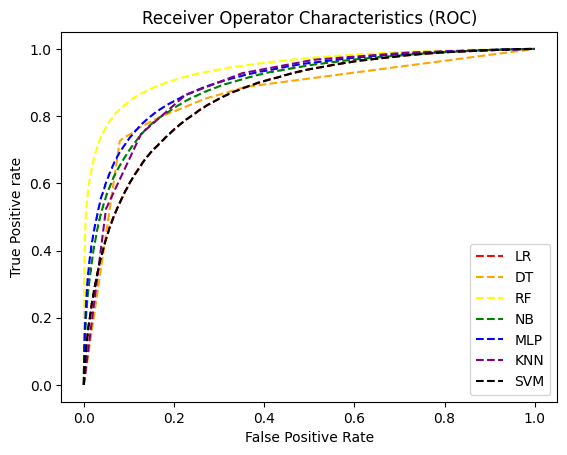

In [ ]:
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, logReg.predict_proba(X_test)[:,1])
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test, grid_search.predict_proba(X_test)[:,1])
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, model_grid.predict_proba(X_test)[:,1])
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, gs_NB.predict_proba(X_test)[:,1])
fpr_MLP, tpr_MLP, thresholds_MLP = roc_curve(y_test, model_mlp.predict_proba(X_test)[:,1])
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
plt.plot(fpr_LR, tpr_LR, linestyle = "--", color = "red", label = "LR")
plt.plot(fpr_DT, tpr_DT, linestyle = "--", color = "orange", label = "DT")
plt.plot(fpr_RF, tpr_RF, linestyle = "--", color = "yellow", label = "RF")
plt.plot(fpr_NB, tpr_NB, linestyle = "--", color = "green", label = "NB")
plt.plot(fpr_MLP, tpr_MLP, linestyle = "--", color = "blue", label = "MLP")
plt.plot(fpr_KNN, tpr_KNN, linestyle = "--", color = "purple", label = "KNN")
plt.plot(fpr_SVM, tpr_SVM, linestyle = "--", color = "black", label = "SVM")
plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

Step 8: Storing the Model

In [ ]:
import joblib

In [ ]:
joblib.dump(rf, 'loan_application_predict')

['loan_application_predict']

Step 9: Loading the Model

In [ ]:
model = joblib.load('loan_application_predict')

Step 10: Interacting with the Model

In [ ]:
new_applicant = pd.read_csv('((GAssign) NewApplicants.csv')

In [ ]:
new_applicant.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,A01,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,NaN
1,A02,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,NaN
2,A03,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,NaN
3,A04,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,NaN
4,A05,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,NaN


In [ ]:
new_applicant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          20 non-null     object 
 1   Age             20 non-null     int64  
 2   Income          20 non-null     int64  
 3   LoanAmount      20 non-null     int64  
 4   CreditScore     20 non-null     int64  
 5   MonthsEmployed  20 non-null     int64  
 6   NumCreditLines  20 non-null     int64  
 7   InterestRate    20 non-null     float64
 8   LoanTerm        20 non-null     int64  
 9   DTIRatio        20 non-null     float64
 10  Education       20 non-null     object 
 11  EmploymentType  20 non-null     object 
 12  MaritalStatus   20 non-null     object 
 13  HasMortgage     20 non-null     object 
 14  HasDependents   20 non-null     object 
 15  LoanPurpose     20 non-null     object 
 16  HasCoSigner     20 non-null     object 
 17  Default         0 non-null      float

In [ ]:
application = new_applicant.drop(['Default'], axis=1)
application_new = application.drop(['LoanID'], axis=1)

In [ ]:
application_new['Education'] = application_new['Education'].map({"Bachelor's": 0, "High School": 1, "Master's": 2, "PhD": 3} ).astype(int)
application_new['EmploymentType'] = application_new['EmploymentType'].map( {'Full-time': 0, 'Part-time': 1,'Unemployed':2, 'Self-employed': 3} ).astype(int)
application_new['MaritalStatus'] = application_new['MaritalStatus'].map( {'Divorced': 0, 'Married': 1, 'Single': 2}).astype(int)
application_new['HasMortgage'] = application_new['HasMortgage'].map( {'No': 0, 'Yes': 1}).astype(int)
application_new['HasDependents'] = application_new['HasDependents'].map( {'No': 0, 'Yes': 1}).astype(int)
application_new['LoanPurpose'] = application_new['LoanPurpose'].map( {'Auto': 0, 'Business': 1, 'Education': 2, 'Home': 3, 'Other': 4}).astype(int)
application_new['HasCoSigner'] = application_new['HasCoSigner'].map( {'No': 0, 'Yes': 1}).astype(int)
application_new.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,2,0,1,1,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,2,0,0,1,0,0


In [ ]:
application_scale = scaler.fit_transform(application_new)

In [ ]:
result = model.predict(application_scale)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
result